In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load dataset
df = pd.read_csv('climate_action_data.csv')

In [48]:
# Inspect the dataset
print("Initial shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values in each column:\n", df.nunique())

Initial shape: (913, 10)

Data types:
 Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

Missing values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Unique values in each column:
 Sensor_ID                        800
Date                             798
Soil_Moisture(%)                 750
Soil_pH                

In [49]:
# Intial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [50]:
# Clean the data

# a) Handle missing values:
# Check for missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())
# Fill missing values
# For simplicity, we will fill missing values with mean for numerical features

# For numerical features: fill with mean
num_cols = ['Soil_Moisture', 'Soil_pH', 'Temperature', 'Humidity', 'Fertilizer_Recommended', 'Irrigation_Recommended'] 
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to numeric, coercing errors to NaN
# fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].mean())
# For Sensor_ID  and Drone_Image_ID, we can fill missing values with the median
id_cols = ['Sensor_ID', 'Drone_Image_ID']
for col in id_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, coercing errors to NaN
        # fill NaN values with the median of the column
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        mode = df[col].mode()
        if not mode.empty:
            df[col] = df[col].fillna(mode[0])  # fill NaN values with the mode of the column
        else:
            # If mode is empty (e.g., all values are NaN), fill with a placeholder or leave as is
            df[col] = df[col].fillna('Unknown')

# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())        


Missing values before cleaning:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
Missing values after handling:
Sensor_ID                        913
Date                               4
Soil_Moisture(%)                   0
Soil_pH                            0
Temperature(C)                     0
Humidity(%)                        0
Crop_Type                          0
Fertilizer_Recommended(kg/ha)      0
Irrigation_Recommended(mm)         0
Drone_Image_ID                   913
dtype: int64


c:\Users\DANIEL CHRISTIAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\DANIEL CHRISTIAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [51]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Replace 'error' entries with NaN
df.replace('error', np.nan, inplace=True)
        
# Fill NaN values with the mean of the column
# Since 'col' is 'Crop_Type' (categorical), filling with mean is not appropriate.
# If you want to fill NaN values for all numeric columns after replacing 'error', do:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())


In [ ]:
# Wrong Data Types
# Convert 'Sensor_ID' and Drone_Image_ID to string if it is categorical
if 'Drone_Image_ID' in df.columns:
    df['Drone_Image_ID'] = df['Drone_Image_ID'].astype(str)
        
if 'Sensor_ID' in df.columns:
    df['Sensor_ID'] = df['Sensor_ID'].astype(str)
    
measurement_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in measurement_cols:
    if col in df.columns:
# Remove extreme outliers (beyond the standard deviations)
        mean = df[col].mean()
        std_dev = df[col].std()
        df = df[(df[col] >= mean - 3 * std_dev) & (df[col] <= mean + 3 * std_dev)]

In [57]:
# Duplicates
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 111


In [59]:
#Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

# Show updated missing values
print("\nMissing values after 'error' replacement:\n", df.isnull().sum())

Number of rows after removing duplicates: 799
Number of duplicate dates: 0

Missing values after 'error' replacement:
 Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 5
Soil_pH                          0
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [63]:
# Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Numerical: fill with mean
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

# Categorical: fill with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [60]:
# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
                                 Date     Soil_pH
count                            798  799.000000
mean   2026-02-04 07:45:33.834586624    6.252751
min              2025-01-01 00:00:00    4.520000
25%              2025-07-19 06:00:00    5.330000
50%              2026-02-03 12:00:00    6.255639
75%              2026-08-23 18:00:00    7.080000
max              2027-03-11 00:00:00    8.000000
std                              NaN    1.021260


In [64]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    object        
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    object        
 5   Humidity(%)                    799 non-null    object        
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    object        
 8   Irrigation_Recommended(mm)     799 non-null    object        
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 68.7+ KB
Missing values after all

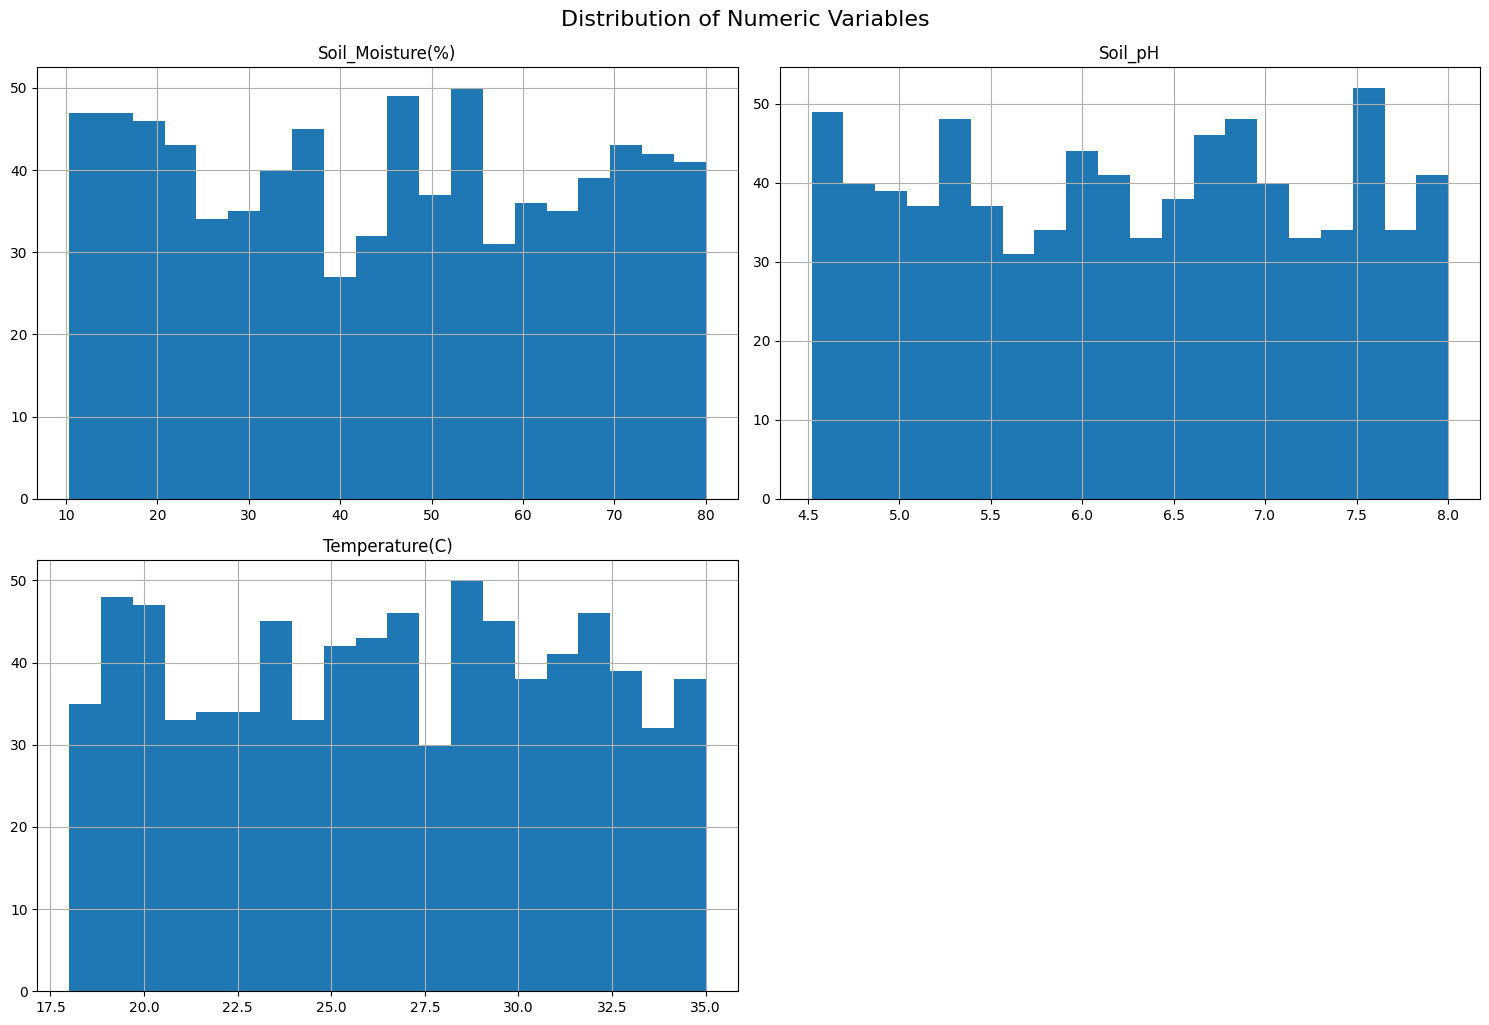

In [ ]:
#Histogram for Distribution of Numeric Variables
#Purpose: To understand the spread and central tendencies of variables like soil moisture, pH, temperature, etc.

df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Distribution of Numeric Variables', fontsize=16, y=1.02)
plt.show()


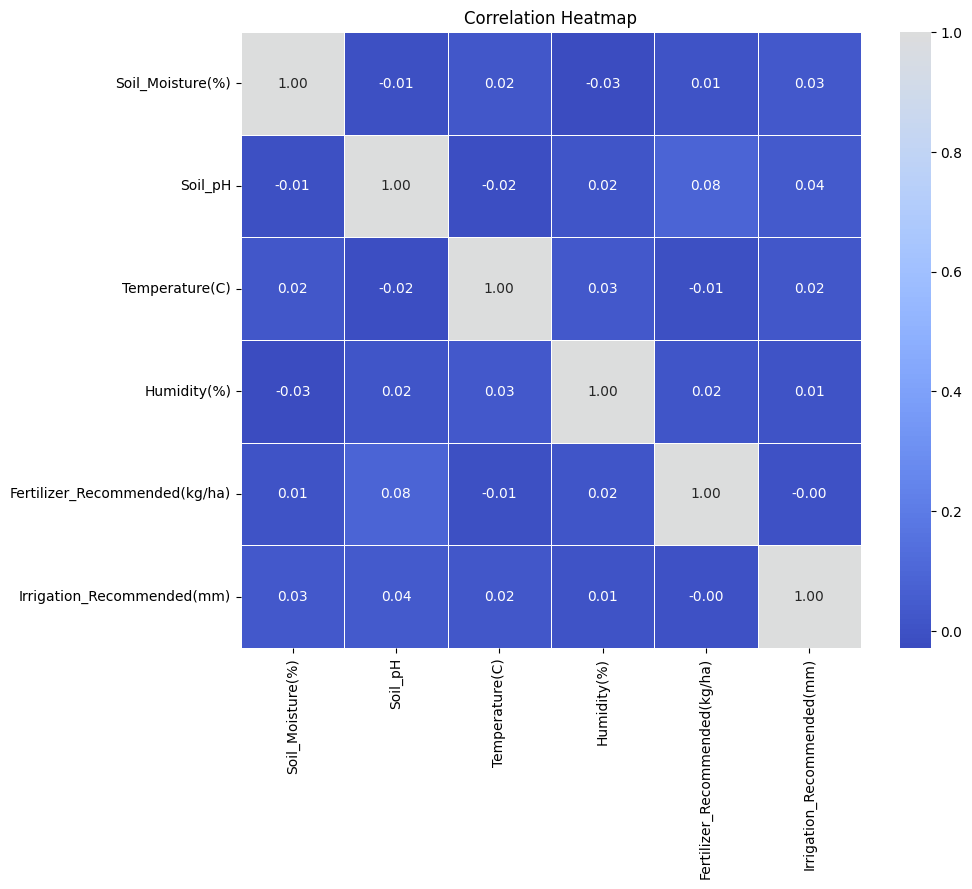

In [68]:
# Analysis
# Correlation Analysis
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

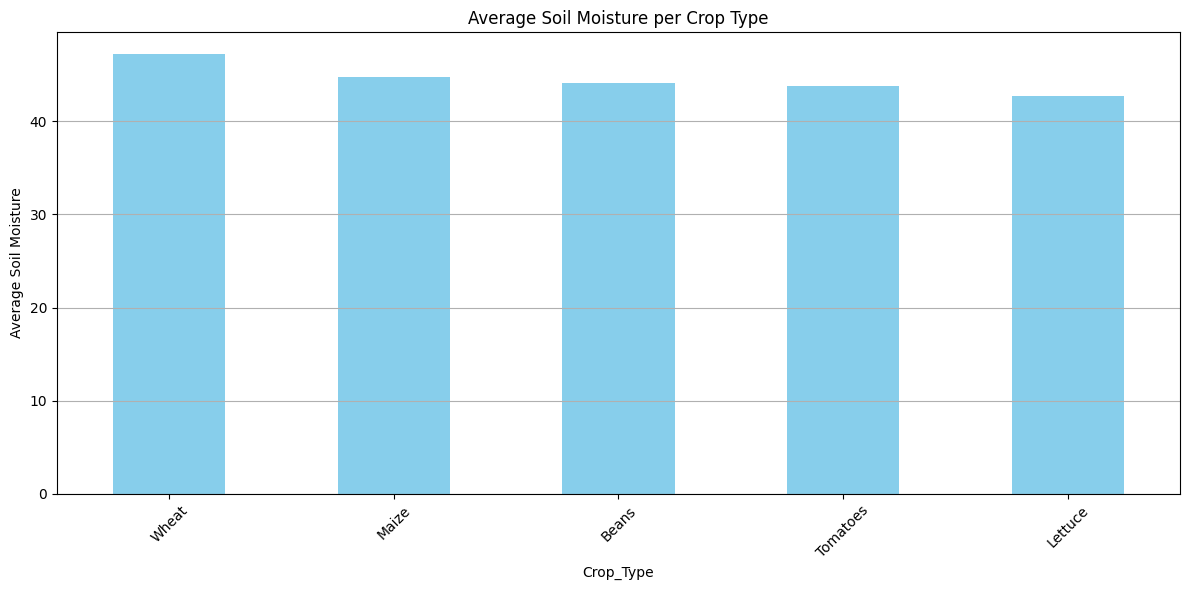

In [82]:
# Bar Plot of Average Soil Moisture by Crop Type
# Purpose: To determine which crop type has the highest average soil moisture.

plt.figure(figsize=(12, 6))
# Convert Soil_Moisture(%) to numeric before grouping
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Soil Moisture')
plt.title('Average Soil Moisture per Crop Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



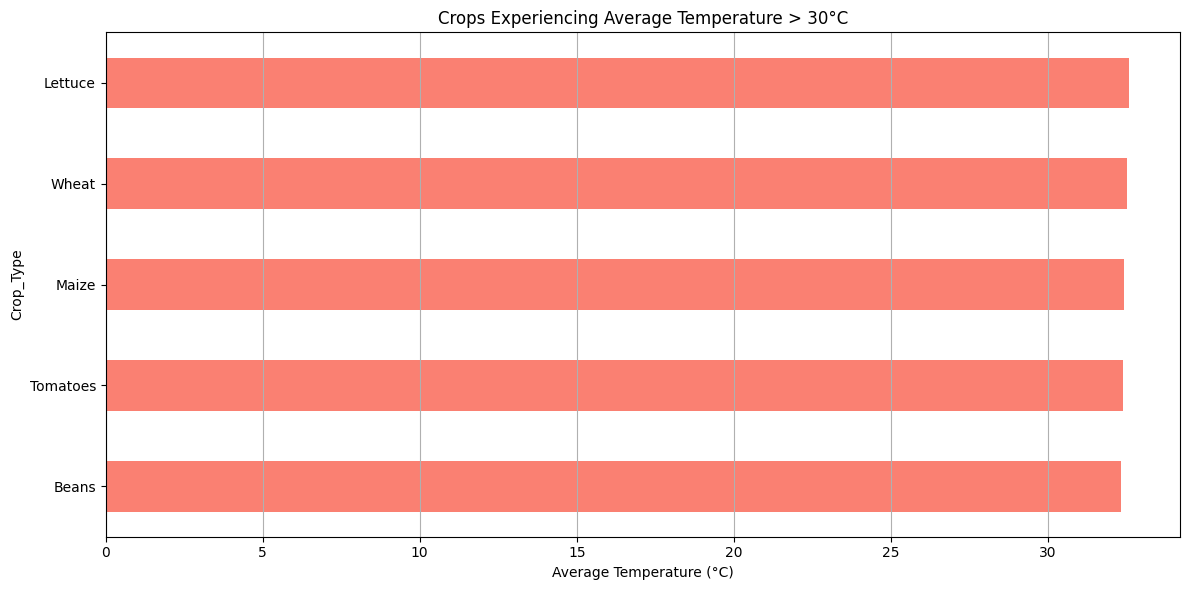

In [86]:
# Bar Plot for Average Temperature of Crops Above 30°C
# Purpose: To support irrigation adjustment recommendations for high-temperature crops.

# Ensure Temperature(C) is numeric
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
high_temp_crops = df[df['Temperature(C)'] > 30]
avg_temp_per_crop = high_temp_crops.groupby('Crop_Type')['Temperature(C)'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_temp_per_crop.plot(kind='barh', color='salmon')
plt.xlabel('Average Temperature (°C)')
plt.title('Crops Experiencing Average Temperature > 30°C')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
#From my Analysis

#Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. Soil_pH is the variable that most influences fertilizer recommendations
# 3. Wheat is the crop type with the highest average soil moisture.
# 4. There is no significant relationship between soil pH and temperature, but both are crucial for crop health.
# 5. Crops experiencing average temperatures above 30°C require special irrigation considerations.      



#Recommendations
# 1. These crops need more frequent irrigation, especially during the hottest times.
# 2. Drip irrigation or night-time watering can help conserve water and reduce stress.
# 3. If temperatures are unusually high, consider temporary shading methods or mulching to retain soil moisture.
# 4. I recommend that soil_pH and temperature should be monitored for precise fertilizer application.

In [90]:
# Export cleaned dataset
df.to_csv('cleaned_climate_action_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_climate_action_data.csv'")



Cleaned dataset saved as 'cleaned_climate_action_data.csv'
